In [6]:
pip install pandas numpy seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
# untuk mengimpor dataset diabetes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
mydata = pd.read_csv('diabetes.csv') # untuk membaca dataset

In [10]:
mydata.head() # untuk melihat 5 data teratas pada file diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.0,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.0,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.0,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,167.0,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1


In [30]:
# imputasi missing value dengan mean, medin, modus
mydata = pd.DataFrame({
    'Pregnancies' : [6, 1, 8, 1, 0],
    'Glucose' : [None, 85, 183, 89, None],
    'BloodPressure' : [72, 66, 64, 66, 40],
    'SkinThickness' : [35, 29, 0, 23, 35],
    'Insulin' : [0, 0, 0, 94, 168],
    'BMI' : [None, None, 23.3, 28.1, 43.1],
    'DiabetesPedigreeFunction' : [627, 351, 671, 167, None],
    'Age' : [None, 31, 32, 21, 33],
    'Outcome' : [1, 0, 1, 0, 1]
})
print(mydata.isnull().sum())

mydata_mean = mydata.fillna(mydata.mean())
mydata_median = mydata.fillna(mydata.median())
mydata_mode = mydata.fillna(mydata.mode())

print(mydata_mean.isnull().sum())
print(mydata_median.isnull().sum())
print(mydata_mode.isnull().sum())

Pregnancies                 0
Glucose                     2
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         2
DiabetesPedigreeFunction    1
Age                         1
Outcome                     0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 0
Glucose                     1
BloodPressure               0
SkinThickness               0
Insulin                     0
B

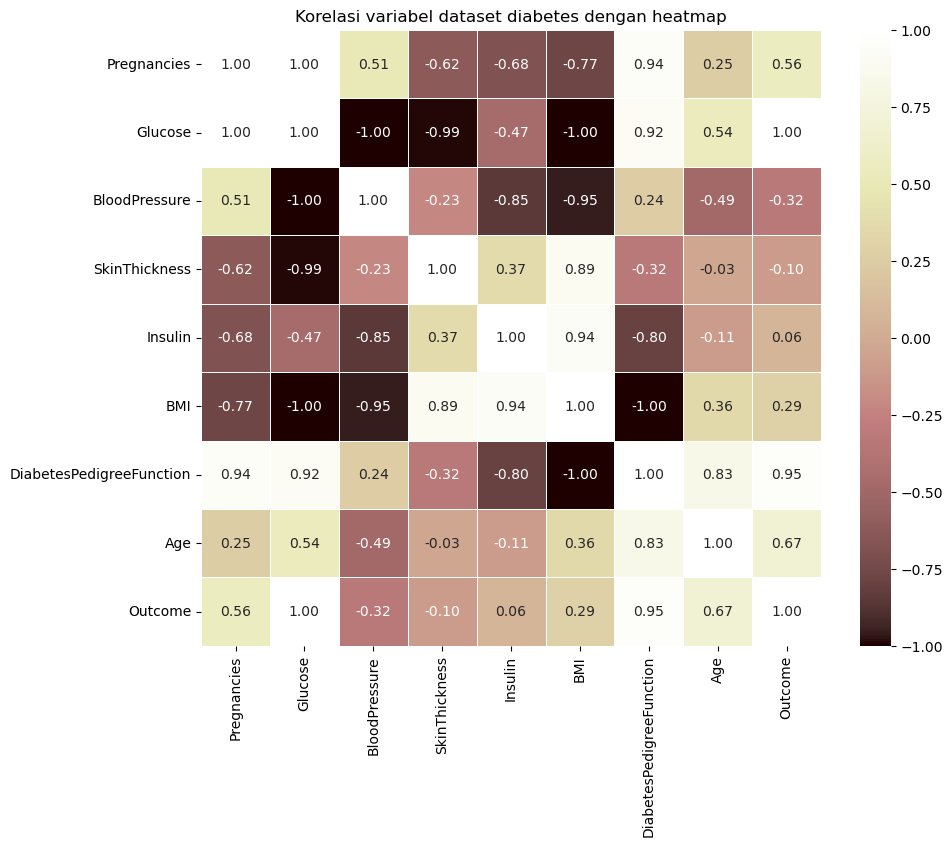

In [16]:
# korelasi antar variabel
corr = mydata.corr()

# visualisasi korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='pink', fmt='.2f', linewidths=0.5)
plt.title('Korelasi variabel dataset diabetes dengan heatmap')
plt.show()

In [18]:
from sklearn.utils import resample

# Misalkan 'Glucose' adalah label untuk diabetes
majority_class = mydata[mydata.Glucose == 183]
minority_class = mydata[mydata.Glucose == 85]

# Undersampling
majority_class_undersampled = resample(majority_class,
                                        replace=False,  # tanpa pengembalian
                                        n_samples=len(minority_class),  # sama dengan jumlah minoritas
                                        random_state=42)  # untuk reproduktifitas

# Menggabungkan kembali dengan fungsi concat
undersampled_data = pd.concat([majority_class_undersampled, minority_class])

# Cek distribusi data 'Glucose'
print(undersampled_data['Glucose'].value_counts())

Glucose
183.0    1
85.0     1
Name: count, dtype: int64


In [24]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

X = undersampled_data.drop('Glucose', axis=1)
y = undersampled_data['Glucose']

# Menerapkan Robust Scaler
robust_scaler = RobustScaler()
data_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(data.drop('Glucose', axis=1)), columns=data.columns[:-1])

# Menerapkan MinMax Scaler
minmax_scaler = MinMaxScaler()
data_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(data.drop('Glucose', axis=1)), columns=data.columns[:-1])

# Menampilkan data yang sudah di skala
print("Data setelah Robust Scaling:")
print(data_robust_scaled.head())

print("Data setelah MinMax Scaling:")
print(data_minmax_scaled.head())

Data setelah Robust Scaling:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0          0.6  0.000000        0.37500      -0.298755       NaN  0.909091   
1         -0.4 -0.333333        0.18750      -0.298755       NaN  0.148760   
2          1.0 -0.444444       -0.71875      -0.298755 -0.961957  1.033058   
3         -0.4 -0.333333        0.00000       0.481328 -0.440217 -0.358127   
4         -0.6 -1.777778        0.37500       1.095436  1.190217       NaN   

   DiabetesPedigreeFunction  Age  
0                       NaN  1.0  
1                    0.1250  0.0  
2                    0.1875  1.0  
3                   -0.5000  0.0  
4                    0.2500  1.0  
Data setelah MinMax Scaling:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.631579       0.353535       0.000000       NaN  0.628849   
1     0.058824  0.578947       0.292929       0.000000       NaN  0.351991   
2     0.470588  0.561404     